# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import cv2

### 2.3 Load Image into TF Data Pipeline

In [ ]:
images = tf.data.Dataset.list_files('/content/drive/MyDrive/bird_detection_images/train/images/*.jpg')

In [ ]:
images.as_numpy_iterator().next()

b'/content/drive/MyDrive/bird_detection_images/train/images/eagle22.jpg'

In [2]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image)

In [ ]:
images.as_numpy_iterator().next()

array([[[250, 249, 245],
        [250, 249, 245],
        [250, 249, 245],
        ...,
        [251, 247, 244],
        [251, 247, 244],
        [251, 247, 244]],

       [[250, 249, 245],
        [250, 249, 245],
        [250, 249, 245],
        ...,
        [251, 247, 244],
        [251, 247, 244],
        [251, 247, 244]],

       [[250, 249, 245],
        [250, 249, 245],
        [250, 249, 245],
        ...,
        [251, 247, 244],
        [251, 247, 244],
        [251, 247, 244]],

       ...,

       [[161, 168, 184],
        [162, 169, 185],
        [163, 170, 186],
        ...,
        [195, 201, 213],
        [198, 204, 216],
        [200, 206, 218]],

       [[162, 169, 185],
        [162, 169, 185],
        [164, 171, 187],
        ...,
        [186, 192, 204],
        [190, 196, 208],
        [193, 199, 211]],

       [[160, 167, 183],
        [161, 168, 184],
        [163, 170, 186],
        ...,
        [171, 177, 189],
        [176, 182, 194],
        [179, 185, 197]]

In [ ]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

### 2.4 View Raw Images with Matplotlib

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

InvalidArgumentError: ignored

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [ ]:
90*.7 # 63 to train

In [ ]:
90*.15 # 14 and 13 to test and val

### 3.2 Move the Matching Labels

In [3]:
import os

In [ ]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('/content/drive/MyDrive/bird_detection_images', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('/content/drive/MyDrive/bird_detection_images','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('/content/drive/MyDrive/bird_detection_images',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [ ]:
!pip install --upgrade opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.9 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
!pip install --upgrade albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 31.7 MB/s 
     |████████████████████████████████| 48.3 MB 1.8 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import albumentations as alb

In [ ]:
augmentor = alb.Compose([
                         #alb.RandomCrop(width=new_width, height=new_height), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [ ]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/bird_detection_images','train', 'images','s1.jpg'))

NameError: ignored

In [ ]:
with open(os.path.join('/content/drive/MyDrive/bird_detection_images', 'train', 'labels', 's1.json'), 'r') as f:
    label = json.load(f)

In [ ]:
label['shapes'][0]['points']

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [ ]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:
coords

[318.7808219178082, 44.945205479452056, 1066.7260273972604, 757.2739726027397]

In [ ]:
height,width,ch=img.shape

In [ ]:
height,width

(914, 1280)

In [ ]:
new_height=int(height-height*0.1)
new_width=int(width-width*0.1)
print(new_height)
print(new_width)

972
1728


In [ ]:
coords = list(np.divide(coords, [width,height,width,height]))

In [ ]:
coords

[0.24904751712328768,
 0.04917418542609634,
 0.8333797089041097,
 0.8285273223224724]

In [ ]:
import shutil
shutil.rmtree('/content/drive/MyDrive/bird_detection_images/aug_data')

### 4.4 Apply Augmentations and View Results

In [ ]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['bird'])

In [ ]:
augmented['bboxes'][0][2:]

(0.8333797089041097, 0.9508258145739037)

In [ ]:
augmented['bboxes']

[(0.24904751712328768,
  0.1714726776775276,
  0.8333797089041097,
  0.9508258145739037)]

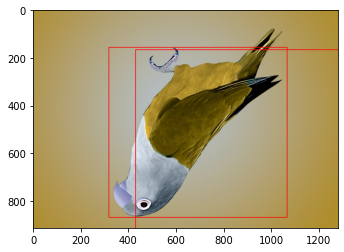

In [ ]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [width,height]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [width,height]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [ ]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('/content/drive/MyDrive/bird_detection_images', partition, 'images')):
        img = cv2.imread(os.path.join('/content/drive/MyDrive/bird_detection_images', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('/content/drive/MyDrive/bird_detection_images', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            height,width,ch=img.shape
            coords = list(np.divide(coords, [width,height,width,height]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['bird'])
                cv2.imwrite(os.path.join('/content/drive/MyDrive/bird_detection_images/aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('/content/drive/MyDrive/bird_detection_images/aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.8165974145891044, 0.18318256578947367, 0.333756540473992, 0.923314144736842, 'bird'].
y_max is less than or equal to y_min for bbox [0.13814805722320173, 0.9370716882188188, 0.9270872854687885, 0.050652523687503725, 'bird'].
x_max is less than or equal to x_min for bbox [0.821953405017921, 0.9274193548387097, 0.25519713261648747, 0.01941457586618877, 'bird'].
x_max is less than or equal to x_min for bbox [0.8728614339819772, 0.11951536519413777, 0.019611684297592594, 0.9441713850336884, 'bird'].
x_max is less than or equal to x_min for bbox [0.7676869501466276, 0.032749304077288356, 0.20179618768328444, 0.7234618991619154, 'bird'].
x_max is less than or equal to x_min for bbox [0.993881536989796, 0.9322915110407267, 0.0013751594387755098, 0.010487943347177817, 'bird'].
x_max is less than or equal to x_min for bbox [0.8306832026490892, 0.9878419452887537, 0.02887549071673278, 0.020859407592824362, 'bird'].
x_max is less than or equal to x

### 5.2 Load Augmented Images to Tensorflow Dataset

In [4]:
train_images = tf.data.Dataset.list_files('/content/drive/MyDrive/bird_detection_images/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [5]:
test_images = tf.data.Dataset.list_files('/content/drive/MyDrive/bird_detection_images/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [6]:
val_images = tf.data.Dataset.list_files('/content/drive/MyDrive/bird_detection_images/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [9]:
train_images.as_numpy_iterator().next()

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [7]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [9]:
train_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/bird_detection_images/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [8]:
test_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/bird_detection_images/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [10]:
val_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/bird_detection_images/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [11]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [12]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(6600, 6600, 900, 900, 1020, 1020)

### 7.2 Create Final Datasets (Images/Labels)

In [15]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [13]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [17]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()[1]

### 7.3 View Images and Annotations

In [ ]:
data_samples = train.as_numpy_iterator()

In [ ]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


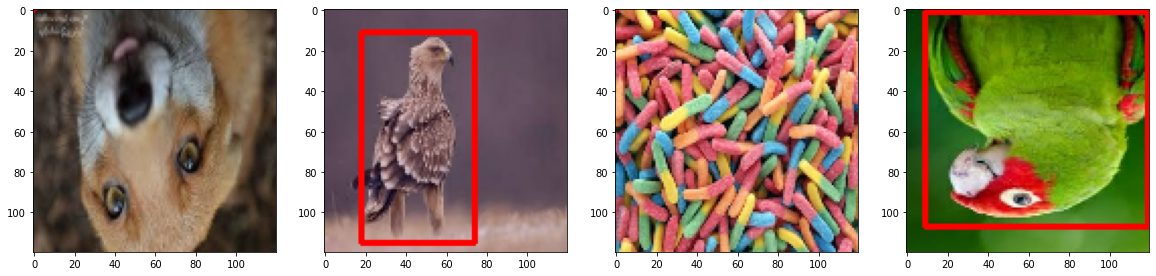

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [ ]:
vgg = VGG16(include_top=False)

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [ ]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [ ]:
facetracker = build_model()

In [ ]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_5[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_2 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [ ]:
X, y = train.as_numpy_iterator().next()

In [ ]:
X.shape

(8, 120, 120, 3)

In [ ]:
classes, coords = facetracker.predict(X)

In [ ]:
classes, coords

(array([[0.4167035 ],
        [0.52737385],
        [0.5193339 ],
        [0.4348812 ],
        [0.44877446],
        [0.42217284],
        [0.4790461 ],
        [0.5135856 ]], dtype=float32),
 array([[0.765402  , 0.40947795, 0.6818909 , 0.4510048 ],
        [0.6973344 , 0.3342661 , 0.6522365 , 0.40632686],
        [0.7499848 , 0.2777245 , 0.60596037, 0.40723673],
        [0.7350343 , 0.349271  , 0.6922451 , 0.47170827],
        [0.7236236 , 0.19980203, 0.6090298 , 0.4018169 ],
        [0.6966044 , 0.3557345 , 0.60859984, 0.4258743 ],
        [0.7831    , 0.475775  , 0.6829652 , 0.34651962],
        [0.77486116, 0.29822358, 0.7087401 , 0.5235811 ]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [ ]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

### 9.2 Create Localization Loss and Classification Loss

In [ ]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [ ]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.399328>

In [ ]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6513999>

In [ ]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.399328>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [ ]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [ ]:
model = FaceTracker(facetracker)

In [ ]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
825/825 [==============================] - 907s 1s/step - total_loss: 0.3684 - class_loss: 0.0826 - regress_loss: 0.3271 - val_total_loss: 0.0047 - val_class_loss: 3.2620e-05 - val_regress_loss: 0.0047
Epoch 2/10
825/825 [==============================] - 76s 74ms/step - total_loss: 0.0090 - class_loss: 2.2271e-04 - regress_loss: 0.0088 - val_total_loss: 2.3599 - val_class_loss: 2.3427 - val_regress_loss: 1.1885
Epoch 3/10
825/825 [==============================] - 76s 74ms/step - total_loss: 0.0057 - class_loss: 7.7753e-05 - regress_loss: 0.0056 - val_total_loss: 2.4834 - val_class_loss: 2.2489 - val_regress_loss: 1.3589
Epoch 4/10
825/825 [==============================] - 76s 74ms/step - total_loss: 0.0028 - class_loss: 3.4619e-05 - regress_loss: 0.0027 - val_total_loss: 0.1083 - val_class_loss: 0.0525 - val_regress_loss: 0.0820
Epoch 5/10
825/825 [==============================] - 76s 74ms/step - total_loss: 0.0026 - class_loss: 2.3684e-05 - regress_loss: 0.0026 - val_to

### 10.3 Plot Performance

In [ ]:
hist.history

{'class_loss': [0.00011935044312849641,
  9.246896661352366e-05,
  2.214498999819625e-05,
  1.5929859728203155e-05,
  1.3128612408763729e-05,
  4.6268696678453125e-06,
  4.820561571250437e-06,
  1.5944316373861511e-06,
  1.3485622503139894e-06,
  2.133932866854593e-05],
 'regress_loss': [0.010942001827061176,
  0.006849407218396664,
  0.0011911834590137005,
  0.0008244917844422162,
  0.00019248705939389765,
  0.006386013235896826,
  0.0004009745898656547,
  0.0015648790867999196,
  0.0008883238770067692,
  0.0018388046883046627],
 'total_loss': [0.011001677252352238,
  0.0068956417962908745,
  0.001202255953103304,
  0.0008324566879309714,
  0.00019905137014575303,
  0.006388326641172171,
  0.00040338488179259,
  0.0015656762989237905,
  0.0008889981545507908,
  0.001849474385380745],
 'val_class_loss': [3.261968231527135e-05,
  2.3427443504333496,
  2.2488698959350586,
  0.05254964530467987,
  2.487412691116333,
  3.0994590360933216e-06,
  0.8515007495880127,
  0.31675148010253906,
  

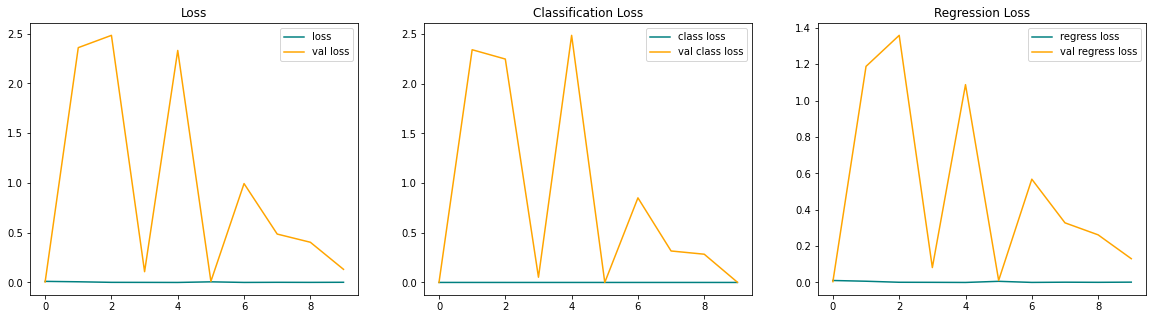

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [17]:
test_data = test.as_numpy_iterator()

In [120]:
test_sample = test_data.next()

In [121]:
yhat = facetracker.predict(test_sample[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


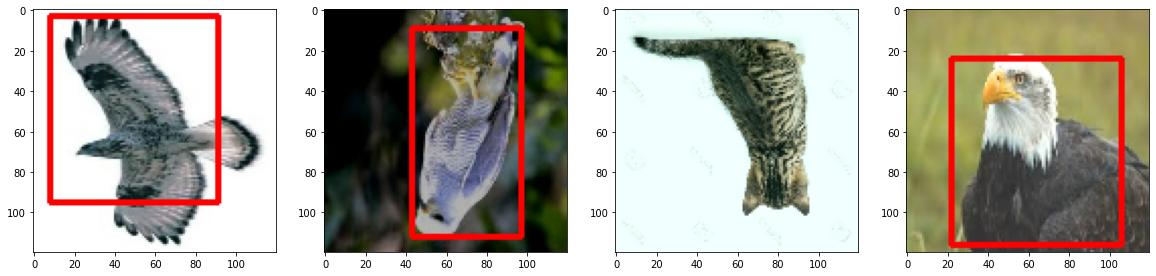

In [122]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [15]:
from tensorflow.keras.models import load_model

In [ ]:
facetracker.save('BirdsDetection.h5')

In [ ]:
facetracker = load_model('BirdsDetection.h5')

In [16]:
facetracker = load_model('/content/drive/MyDrive/BirdsDetection.h5')

# !pip install tensorflow

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf
import keras
import numpy as np

In [ ]:
print(keras.__version__)
print(tensorflow.__version__)

2.9.0
2.9.1


In [ ]:
import cv2

### 11.3 Real Time Detection

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text renderedq
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 694ms/step


# 